# `Geopandas`: GeoSpatial Tabular Data Analysis

We present the roadmap for the notebook:

1. **Introduction**
    - Briefly introduce `GeoPandas` and its role in geospatial analysis
    - Provide the installation instructions
2. **Geospatial Data Structures in GeoPandas**
    - Introduce `GeoSeries` and `GeoDataFrame`
    - Create `GeoSeries` and `GeoDataFrame` from scratch
    - Read and write geospatial data (e.g., `shapefiles`, `GeoJSON`)
3. **Explore and Visualize Geospatial Data**
    - Explore GeoDataFrames: `head`, `tail`, `info`, and `describe` methods
    - Coordinate Reference Systems (CRS) in GeoPandas
    - Basic geospatial data visualization using the `plot()` method
4. **Geometric Operations**
    - Geometry manipulation with GeoPandas and Shapely (e.g., buffer, centroid, area)
    - Spatial joins and overlays (e.g., intersection, union)
5. **Spatial Relationships and Predicates**
    - Point-in-polygon analysis with GeoPandas (e.g., sjoin)
    - Spatial relationships and predicates (e.g., contains, intersects, within)
6. **Coordinate Reference Systems and Transformations**
    - Understanding Coordinate Reference Systems (CRS)
    - Setting and transforming CRS in GeoPandas
7. **Practical Examples and Use Cases**
    - Real-world examples applying concepts and techniques from the notebook
8. **Additional Resources and Further Reading**
    - Links to GeoPandas documentation, tutorials, and other resources for learners to explore further

## Introduction

`GeoPandas` is a powerful Python library designed to make working with geospatial data in Python easier and more efficient. It extends the functionality of `Pandas`, a popular data analysis library, by introducing two new data structures: `GeoSeries` and `GeoDataFrame`. These data structures are built on top of `Shapely` geometries and can efficiently store and manipulate geospatial data.

`GeoPandas` combines the capabilities of `Shapely`, `Fiona`, and `Pyproj`, making it an essential tool for many geospatial analysis tasks, such as **reading and writing geospatial data**, performing **geometric operations**, and **visualizing geospatial data**. With GeoPandas, you can work with both vector and raster data and perform complex geospatial analyses.

### Installation

To install GeoPandas, you can use either pip or conda. It's highly recommended to install GeoPandas and its dependencies within a virtual environment: 

```bash

# Installation using pip
!pip install geopandas

# Installation using conda
!conda install -c conda-forge geopandas
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from shapely import unary_union
import geopandas as gpd
import contextily as ctx
ctx.set_cache_dir("/Users/akramz/.cache/")

## Geospatial Data Structures in GeoPandas

- `GeoPandas` provides two main data structures: 
    - `GeoSeries`: a one-dimensional array that can store and manipulate Shapely geometric objects. It is similar to a `Pandas` `Series` but designed specifically for handling geospatial data.
    - `GeoDataFrame`: a two-dimensional data structure that can store and manipulate tabular data with a **GeoSeries column** for storing geometries. It is similar to a Pandas DataFrame but with additional geospatial functionality.
- The two data structures are designed to handle geospatial data and are built on top of `Pandas` and `Shapely`.

### Creating `GeoSeries` and `GeoDataFrame` from Scratch

To create a GeoSeries or GeoDataFrame from scratch, you can use the following methods:

In [2]:
# Create a GeoSeries
geom_series = gpd.GeoSeries([Point(2.3, 48.8), Point(2.4, 48.9), Point(2.5, 48.7)])
geom_series

0    POINT (2.30000 48.80000)
1    POINT (2.40000 48.90000)
2    POINT (2.50000 48.70000)
dtype: geometry

In [3]:
# Create a GeoDataFrame from a DataFrame and a GeoSeries
data = {
    'name': ['A', 'B', 'C'],
    'population': [1000, 2000, 3000]
}

# Use the dictionary to create a Pandas dataframe
df = pd.DataFrame(data)

# Use the pandas dataframe and the GeoSeries to create a GeoDataframe
gdf = gpd.GeoDataFrame(df, geometry=geom_series)
gdf.head()

,name,population,geometry
0,A,1000,POINT (2.30000 48.80000)
1,B,2000,POINT (2.40000 48.90000)
2,C,3000,POINT (2.50000 48.70000)


### Reading and Writing Geospatial Data

- `GeoPandas` makes it easy to read and write geospatial data, such as `shapefiles` and `GeoJSON` files. 

Here's how to read and write geospatial data using GeoPandas:

In [4]:
# Read GeoJSON file
gdf_paris_districts = gpd.read_file("./data/vector/paris_districts_utm.geojson")
gdf_paris_districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [5]:
# Write GeoJSON file
gdf_paris_districts.to_file("./data/vector/output_paris_districts.geojson", driver="GeoJSON")

In [6]:
# Read shapefile (assuming it's in a zip file)
gdf_countries = gpd.read_file("zip://./data/vector/ne_110m_admin_0_countries.zip")
gdf_countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [7]:
# Write shapefile
gdf_countries.to_file("./data/vector/output_countries.shp")

## Exploring and Visualizing Geospatial Data

- We will explore and visualize geospatial data using `GeoPandas`. 
- We will cover methods to inspect `GeoDataFrame`s and discuss Coordinate Reference Systems (CRS). 
- We will demonstrate how to create basic geospatial visualizations using the `plot()` method.

### Exploring GeoDataFrames

You can use methods like `head()`, `tail()`, `info()`, and `describe()` to inspect and explore GeoDataFrames, similar to how you would use them with Pandas DataFrames.

In [8]:
# Inspect the first 5 rows of the GeoDataFrame
print("Head:")
gdf_paris_districts.head()

Head:


,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [9]:
# Inspect the last 5 rows of the GeoDataFrame
print("Tail:")
gdf_paris_districts.tail()

Tail:


,id,district_name,population,geometry
75,76,Combat,38988,"POLYGON ((455155.128 5414359.413, 455239.337 5..."
76,77,Belleville,35773,"POLYGON ((454767.853 5412865.188, 454761.185 5..."
77,78,Saint-Fargeau,42087,"POLYGON ((457014.145 5413260.154, 457015.161 5..."
78,79,Père-Lachaise,42332,"POLYGON ((455648.392 5411702.054, 455580.676 5..."
79,80,Charonne,62901,"POLYGON ((457155.511 5410584.127, 457153.394 5..."


In [10]:
# Get a summary of the GeoDataFrame's structure
print("Info:")
gdf_paris_districts.info()

Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             80 non-null     int64   
 1   district_name  80 non-null     object  
 2   population     80 non-null     int64   
 3   geometry       80 non-null     geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 2.6+ KB


In [11]:
# Generate descriptive statistics of the GeoDataFrame's columns
print("Describe:")
gdf_paris_districts.describe()

Describe:


,id,population
count,80.0000,80.000000
mean,40.5000,26573.137500
std,23.2379,20235.804847
min,1.0000,1345.000000
25%,20.7500,9413.750000
50%,40.5000,21418.500000
75%,60.2500,39025.250000
max,80.0000,82032.000000


### Coordinate Reference Systems (CRS) in `GeoPandas`

Coordinate Reference Systems (CRS) define how coordinates are related to the Earth's surface. `GeoPandas` allows you to set, inspect, and transform the CRS of a GeoDataFrame. 

The CRS information is stored in the `crs` attribute of a GeoDataFrame.

In [12]:
# Inspect the CRS of the GeoDataFrame
print("CRS of Paris Districts GeoDataFrame:")
print(gdf_paris_districts.crs)

CRS of Paris Districts GeoDataFrame:
epsg:32631


In [13]:
# Inspect the CRS of the Countries GeoDataFrame
print("CRS of Countries GeoDataFrame:")
print(gdf_countries.crs)

CRS of Countries GeoDataFrame:
epsg:4326


### Basic Geospatial Data Visualization with the `plot()` Method

`GeoPandas` provides a simple `plot()` method for visualizing `GeoDataFrame`s. This method creates a matplotlib plot of the geometries in the GeoDataFrame.

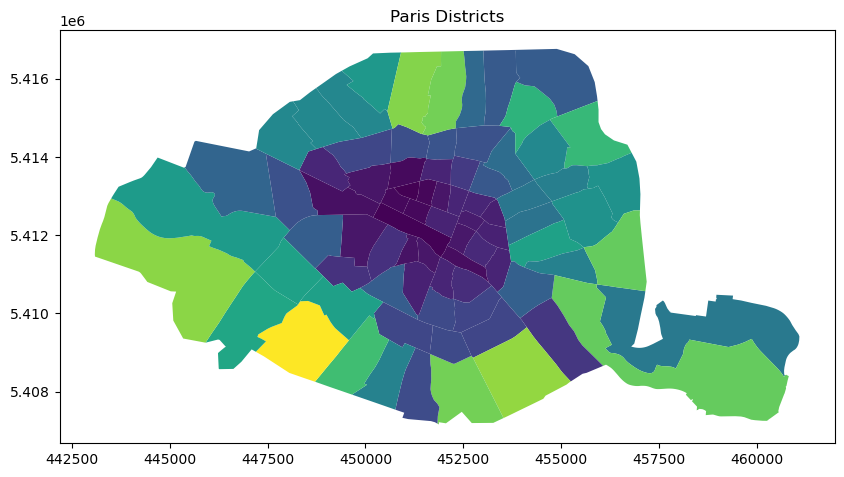

In [14]:
# Plot Paris Districts
gdf_paris_districts.plot(figsize=(10, 10), column="population")
plt.title("Paris Districts")
plt.show()

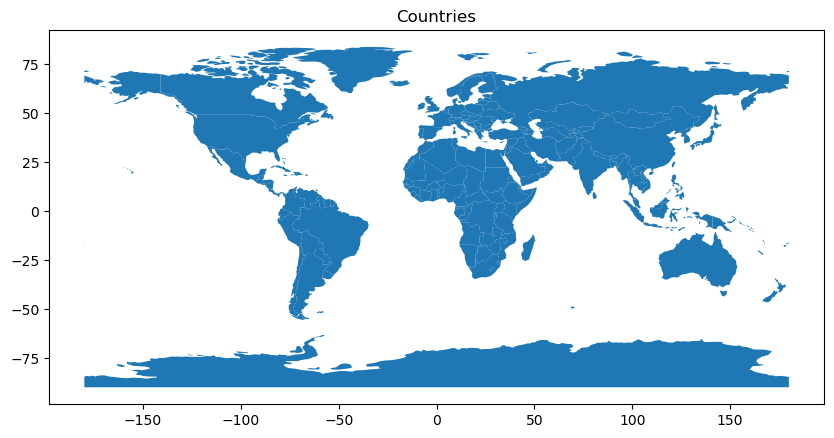

In [15]:
# Plot Countries
gdf_countries.plot(figsize=(10, 6))
plt.title("Countries")
plt.show()

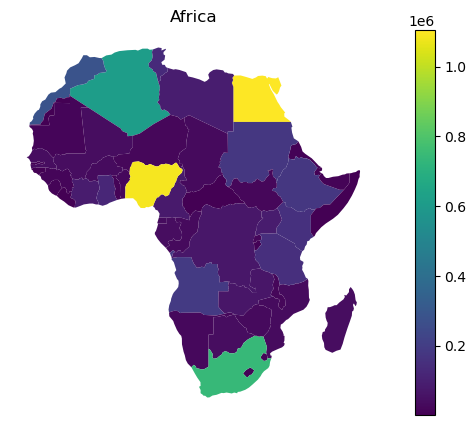

In [16]:
# Plot Africa
ax = gdf_countries[gdf_countries["continent"] == "Africa"].plot(figsize=(10, 5), column="gdp_md_est", legend=True)
ax.axis("off")
plt.title("Africa")
plt.show()

- The above examples demonstrate how to create basic geospatial visualizations using the `plot()` method in `GeoPandas`. 
- You can customize the appearance of these plots by passing additional arguments to the `plot()` method and using matplotlib functions.

## Geometric Operations

In this section, we will explore geometric operations in `GeoPandas`. We'll cover geometry manipulation using both `GeoPandas` and `Shapely`, as well as spatial joins and overlays.

### Geometry Manipulation with `GeoPandas` and `Shapely`

- **`GeoPandas` provides easy access to geometric operations from the `Shapely` library**. 
- You can perform operations such as buffering, computing centroids, and calculating areas directly on `GeoDataFrames` and `GeoSeries`.

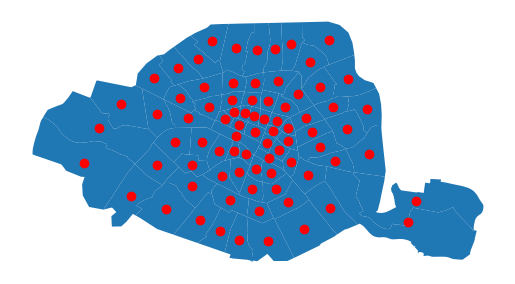

In [17]:
# Get a copy of the district dataset
d = gdf_paris_districts.copy()

# Transform each district's polygon into its centorid 
d["geometry"] = d.centroid

# Plot the districts and centroids
fig, ax = plt.subplots()
_ = gdf_paris_districts.plot(ax=ax)
_ = d.plot(ax=ax, color="red")
ax.axis("off")
plt.show()

Let's calculate the are of each district:

In [18]:
# Area operation
gdf_paris_districts["area"] = gdf_paris_districts.area
print("Area of geometries:")
print(gdf_paris_districts[['geometry', 'area']].head())

Area of geometries:
                                            geometry           area
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  868537.873059
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  412237.139604
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  273549.361878
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  269311.055565
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  187909.748885


### Spatial Joins and Overlays

- Spatial joins and overlays are essential operations for combining and analyzing geospatial data from different sources. 
- `GeoPandas` provides `sjoin()` for spatial joins and `overlay()` for spatial overlays.

In [19]:
# Create a buffer around the first district
first_district = gdf_paris_districts.iloc[0]
buffered_first_district = first_district['geometry'].buffer(500)

In [20]:
# Create a new GeoDataFrame with the buffered geometry
gdf_buffer = gpd.GeoDataFrame(geometry=[buffered_first_district], crs=gdf_paris_districts.crs)

In [22]:
# Perform a spatial join to find districts that intersect the buffer
intersecting_districts = gpd.sjoin(gdf_paris_districts.iloc[1:], gdf_buffer, predicate='intersects')

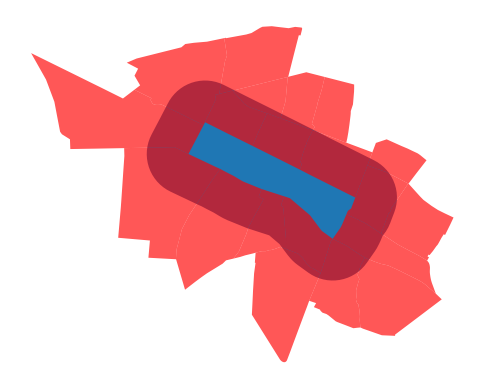

In [23]:
# Plot the districts and centroids
fig, ax = plt.subplots()
_ = gdf_buffer.plot(ax=ax)
_ = intersecting_districts.plot(ax=ax, color="red", alpha=.66)
ax.axis("off")
plt.show()

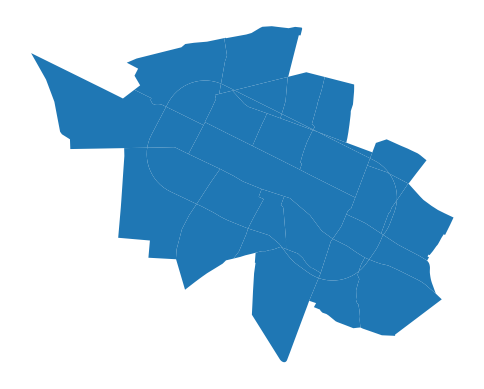

In [26]:
# Perform an overlay to compute the union of intersecting districts
union = gpd.overlay(intersecting_districts, gdf_buffer, how='union')
ax = union.plot()
ax.axis("off")
plt.show()

- In this example, we first create a `buffer` around the first district in the `gdf_paris_districts` GeoDataFrame. 
- We then use spatial join and overlay operations to find intersecting districts and compute the union of those districts.

## Spatial Relationships and Predicates

- In this section, we'll explore spatial relationships and predicates in GeoPandas. 
- We'll cover point-in-polygon analysis and discuss various spatial relationships, such as `contains`, `intersects`, and `within`.

### Point-in-Polygon Analysis with GeoPandas

- Point-in-polygon analysis is a common geospatial operation used to determine if a point is inside a polygon. 
- You can perform point-in-polygon analysis in `GeoPandas` using the `sjoin()` function.

In [27]:
# Create sample points
point_data = {
    'name': ['Point 1', 'Point 2', 'Point 3'],
    'geometry': [Point(2.35, 48.85), Point(2.4, 48.87), Point(2.45, 48.83)]
}
gdf_points = gpd.GeoDataFrame(point_data, crs="EPSG:4326")
gdf_points = gdf_points.to_crs(gdf_paris_districts.crs)

# Perform point-in-polygon analysis using sjoin()
point_in_polygon = gpd.sjoin(gdf_points, gdf_paris_districts, predicate="within")
point_in_polygon

,name,geometry,index_right,id,district_name,population,area
0,Point 1,POINT (452314.891 5410984.888),16,17,Saint-Victor,11661,6.038437e+05
1,Point 2,POINT (456000.492 5413177.992),77,78,Saint-Fargeau,42087,1.486139e+06
2,Point 3,POINT (459634.961 5408703.808),45,46,Picpus,62947,7.201383e+06


In this example, we create a GeoDataFrame with sample points and perform a point-in-polygon analysis using sjoin() to find which Paris district each point belongs to.

### Spatial Relationships and Predicates

`GeoPandas` provides various spatial relationships and predicates to analyze the relationships between geometries in a GeoDataFrame. Some of the most common spatial relationships are `contains`, `intersects`, and `within`.

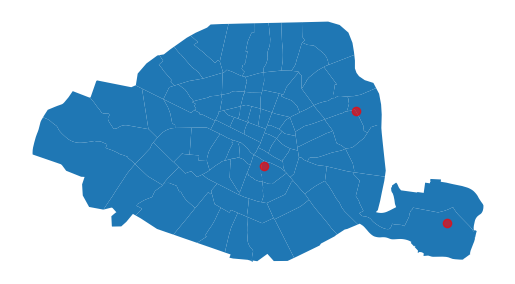

In [28]:
# Let's visualize the districts and points
fig, ax = plt.subplots()
_ = gdf_paris_districts.plot(ax=ax)
_ = gdf_points.plot(ax=ax, color="red", alpha=.66)
ax.axis("off")
plt.show()

Let's filter the districts that contain the points:

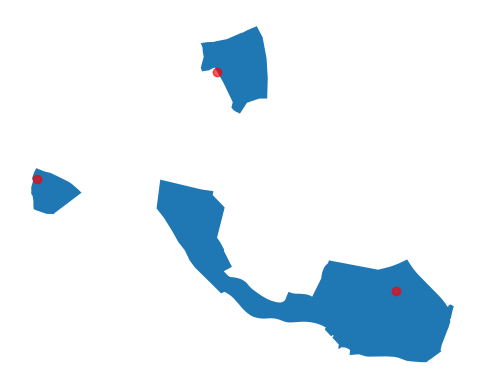

In [29]:
# Create a geometry that has the 3 different points
geom = unary_union(gdf_points["geometry"])

# Filter for districts that intersect it
ds = gdf_paris_districts[gdf_paris_districts.intersects(geom)]

# Plot
fig, ax = plt.subplots()
_ = ds.plot(ax=ax)
_ = gpd.GeoDataFrame(geometry=[geom]).plot(ax=ax, color="red", alpha=.66)
ax.axis("off")
plt.show()

Let's pick one point and check which district contains it:

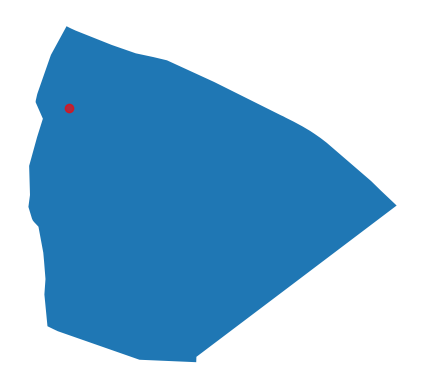

In [30]:
# Get a point geometry and filter for the district that contains it
point_geom = gdf_points.iloc[0:1]
district = gdf_paris_districts[gdf_paris_districts.contains(point_geom.iloc[0, -1])]

# Plot
fig, ax = plt.subplots()
_ = district.plot(ax=ax)
_ = point_geom.plot(ax=ax, color="red", alpha=.66)
ax.axis("off")
plt.show()

In this example, we demonstrated how to use spatial relationships and predicates, such as `contains`, `intersects`, and `within`, to analyze the relationships between sample points and the first district in the `gdf_paris_districts` `GeoDataFrame`.

## Coordinate Reference Systems and Transformations

In this section, we will discuss Coordinate Reference Systems (CRS) and how to set and transform them in `GeoPandas`.

### Coordinate Reference Systems (CRS)

- A Coordinate Reference System (`CRS`) defines how coordinates are related to the Earth's surface. 
- It consists of a **coordinate system (e.g., Cartesian, polar)** and a **projection** that maps points from the Earth's surface onto that coordinate system. 
- A CRS can be represented using an **EPSG code**, a **PROJ string**, or a **WKT string**.

When working with geospatial data from different sources, **it is essential to ensure that the data is in the same CRS**. Otherwise, spatial operations and calculations may produce inaccurate results.

### Setting and Transforming CRS in GeoPandas

`GeoPandas` allows you to set, inspect, and transform the CRS of a `GeoDataFrame`. The CRS information is stored in the crs attribute of a GeoDataFrame, and you can transform the CRS using the `to_crs()` method.

In [31]:
# Inspect the CRS of the Paris Districts GeoDataFrame
print("Original CRS of Paris Districts GeoDataFrame:")
print(gdf_paris_districts.crs)

Original CRS of Paris Districts GeoDataFrame:
epsg:32631


In [32]:
gdf_paris_districts["geometry"].head(3)

0    POLYGON ((451922.133 5411438.484, 451922.080 5...
1    POLYGON ((452278.419 5412160.893, 452192.407 5...
2    POLYGON ((451553.806 5412340.522, 451528.058 5...
Name: geometry, dtype: geometry

In [33]:
# Transform the CRS of the Paris Districts GeoDataFrame to EPSG:3857
gdf_paris_districts_mercator = gdf_paris_districts.to_crs(epsg=3857)

print("Transformed CRS of Paris Districts GeoDataFrame (EPSG:3857):")
print(gdf_paris_districts_mercator.crs)

Transformed CRS of Paris Districts GeoDataFrame (EPSG:3857):
EPSG:3857


In [34]:
gdf_paris_districts_mercator["geometry"].head(3)

0    POLYGON ((260998.942 6250132.905, 260998.863 6...
1    POLYGON ((261530.205 6251237.030, 261402.637 6...
2    POLYGON ((260428.149 6251500.935, 260390.032 6...
Name: geometry, dtype: geometry

In [35]:
# Inspect the CRS of the Countries GeoDataFrame
print("Original CRS of Countries GeoDataFrame:")
print(gdf_countries.crs)

Original CRS of Countries GeoDataFrame:
epsg:4326


In [36]:
# Transform the CRS of the Countries GeoDataFrame to match Paris Districts GeoDataFrame
gdf_countries_transformed = gdf_countries.to_crs(gdf_paris_districts.crs)
print("Transformed CRS of Countries GeoDataFrame:")
print(gdf_countries_transformed.crs)

Transformed CRS of Countries GeoDataFrame:
epsg:32631


# Practical Examples and Use Cases

We will work with several datasets about the city of Paris:
- The administrative districts of Paris: [`paris_districts_utm.geojson`](https://opendata.paris.fr/explore/dataset/quartier_paris/).
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris: [`data/paris_bike_stations_mercator.gpkg`](https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/).

Both datasets are provided as spatial datasets using a GIS file format. 

Let's starting exploring the data:

<div class="alert alert-success">

**EXERCISE**:

We will start with exploring the bicycle station dataset (available as a GeoPackage file: `data/paris_bike_stations_mercator.gpkg`)
    
* Read the stations datasets into a GeoDataFrame called `stations`.
* Check the type of the returned object
* Check the first rows of the dataframes. What kind of geometries does this datasets contain?
* How many features are there in the dataset? 
    
<details><summary>Hints</summary>

* Use `type(..)` to check any Python object type
* The `geopandas.read_file()` function can read different geospatial file formats. You pass the file name as first argument.
* Use the `.shape` attribute to get the number of features

</details>
    
    
</div>

In [37]:
stations = gpd.read_file("./data/vector/paris_bike_stations_mercator.gpkg")
type(stations)

geopandas.geodataframe.GeoDataFrame

In [38]:
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824)
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705)


In [39]:
stations.shape

(1226, 4)

<div class="alert alert-success">

**EXERCISE**:

* Make a quick plot of the `stations` dataset.
* Make the plot a bit larger by setting the figure size to (12, 6) (hint: the `plot` method accepts a `figsize` keyword).
 
</div>

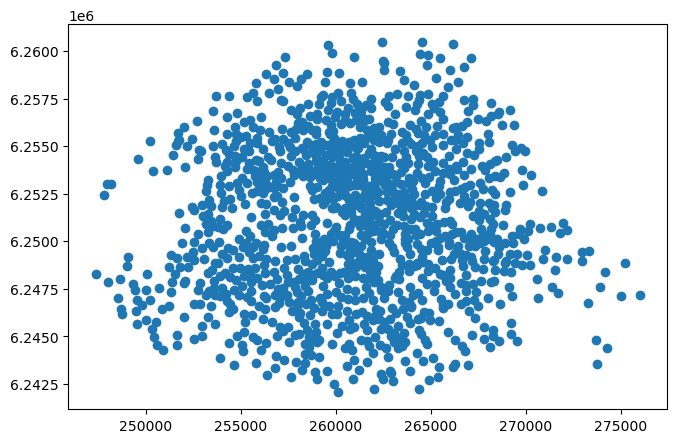

In [40]:
_ = stations.plot(figsize=(10, 5))

A plot with points can be hard to interpret without any spatial context. Therefore, we will learn how to add a background map.

We are going to make use of the [contextily](https://github.com/darribas/contextily) package. the `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data, then pass the matplotlib axes object to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of the plot. 

<div class="alert alert-success">

**EXERCISE**:

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `stations`, but assign the result to an `ax` variable.
* Set the marker size equal to 5 to reduce the size of the points (use the `markersize` keyword of the `plot()` method for this).
* Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

</div>

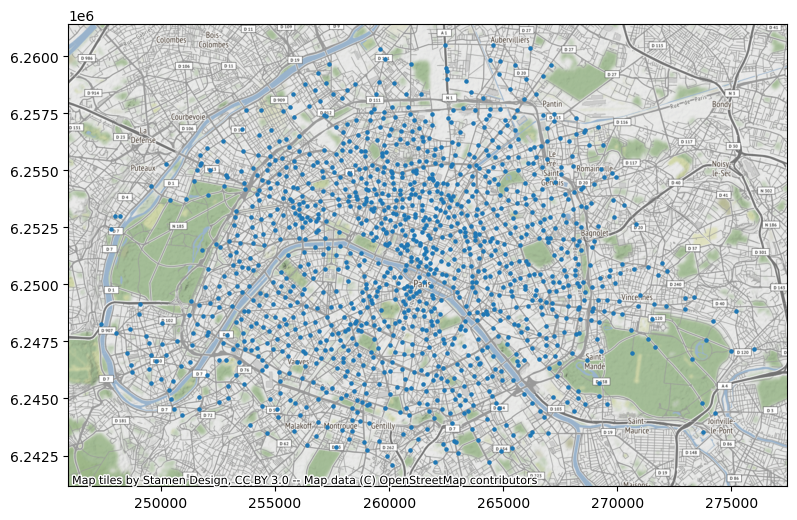

In [42]:
# Plot the stations with a supporting basemap 
ax = stations.plot(figsize=(12, 6), markersize=5)
ctx.add_basemap(ax)

<div class="alert alert-success">

**EXERCISE**:

* Make a histogram showing the distribution of the number of bike stands in the stations.

<details>
  <summary>Hints</summary>

* Selecting a column can be done with the square brackets: `df['col_name']`
* Single columns have a `hist()` method to plot a histogram of its values.
    
</details>
    
</div>

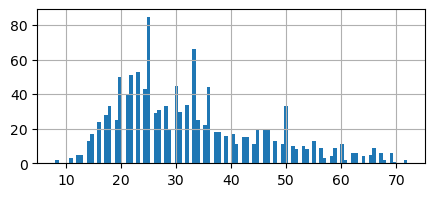

In [43]:
_ = stations["bike_stands"].hist(figsize=(5,2), bins=100)

<div class="alert alert-success">

**EXERCISE**:

Let's now visualize where the available bikes are actually stationed:
    
* Make a plot of the `stations` dataset (also with a (12, 6) figsize).
* Use the `'available_bikes'` columns to determine the color of the points. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.
 
</div>

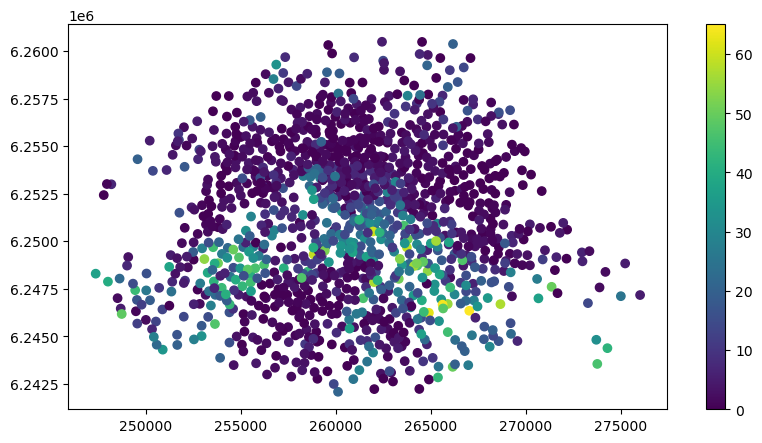

In [46]:
_ = stations.plot(figsize=(10, 5), column='available_bikes', legend=True)

<div class="alert alert-success">

**EXERCISE**:

Next, we will explore the dataset on the administrative districts of Paris (available as a GeoJSON file: "data/paris_districts_utm.geojson")

* Read the dataset into a GeoDataFrame called `districts`.
* Check the first rows of the dataframe. What kind of geometries does this dataset contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
* Make a quick plot of the `districts` dataset (set the figure size to (12, 6)).
    
</div>

In [47]:
districts = gpd.read_file("./data/vector/paris_districts_utm.geojson")
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


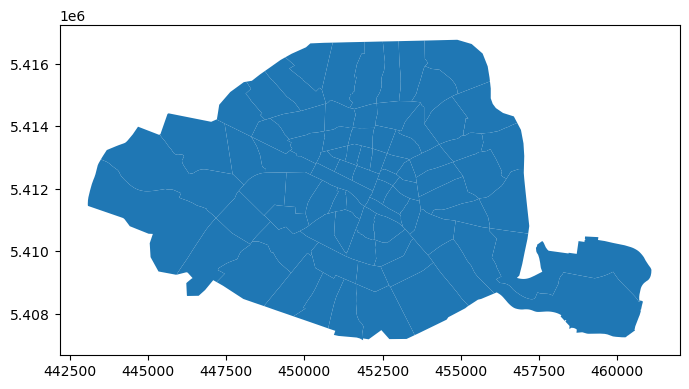

In [49]:
_ = districts.plot(figsize=(8, 6))

<div class="alert alert-success">

**EXERCISE**:
    
What are the largest districts (biggest area)?

* Calculate the area of each district.
* Add this area as a new column to the `districts` dataframe.
* Sort the dataframe by this area column for largest to smallest values (descending).

<details><summary>Hints</summary>

* Adding a column can be done by assigning values to a column using the same square brackets syntax: `df['new_col'] = values`
* To sort the rows of a DataFrame, use the `sort_values()` method, specifying the colum to sort on with the `by='col_name'` keyword. Check the help of this method to see how to sort ascending or descending.

</details>

</div>

In [50]:
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [51]:
# dividing by 10^6 for showing km²
districts["area"] = districts.geometry.area / 1e6

In [52]:
districts.sort_values(by='area', ascending=False)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383
60,61,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679
44,45,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841
61,62,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037
62,63,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",0.271603
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",0.269311
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",0.243418
11,12,Sainte-Avoie,7501,"POLYGON ((452928.277 5412227.550, 452830.786 5...",0.213201


<div class="alert alert-success">

**EXERCISE**:

* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.

</div>

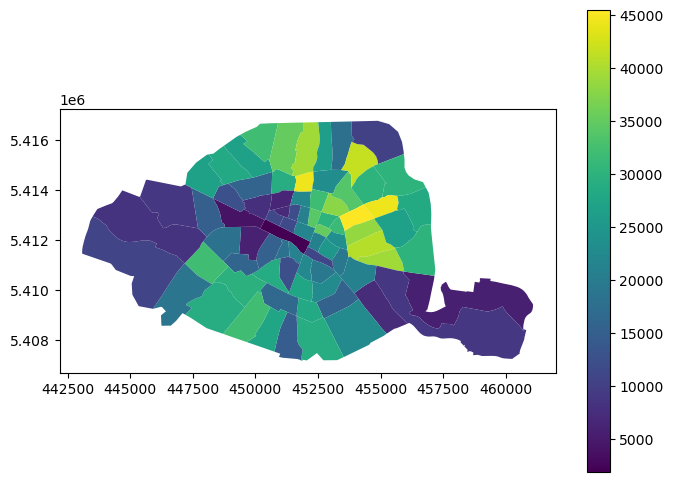

In [53]:
# Add a population density column
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

# Make a plot of the districts colored by the population density
_ = districts.plot(column='population_density', figsize=(8, 6), legend=True)

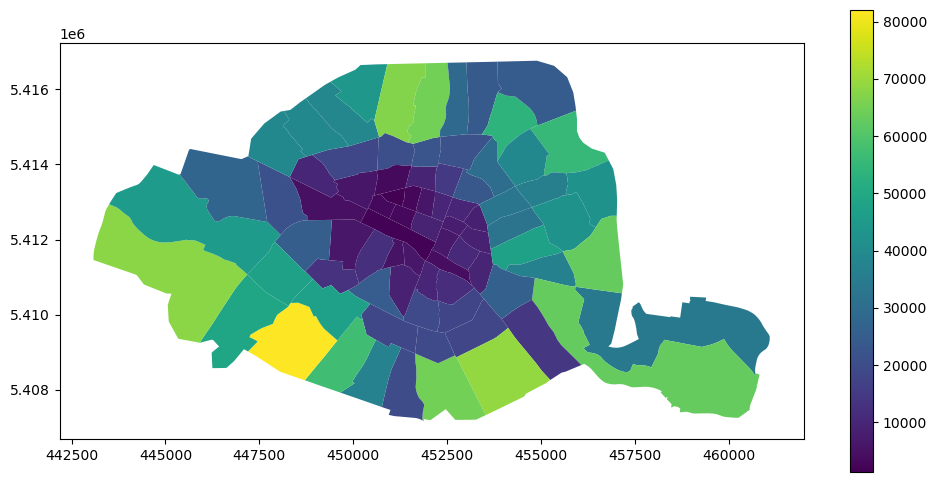

In [54]:
# As comparison, the misleading plot when not turning the population number into a density
_ = districts.plot(column="population", figsize=(12, 6), legend=True)

## Additional Resources and Further Reading

Here are some resources to help you learn more about GeoPandas and further develop your geospatial analysis skills in Python:

- [GeoPandas Documentation](https://geopandas.org/en/stable/): The official documentation is an excellent resource to learn more about GeoPandas, its features, and API. GeoPandas Documentation
- [GeoPandas Gallery](https://geopandas.org/en/stable/gallery/index.html): The GeoPandas Gallery contains various examples and use cases to help you understand the capabilities of the library. GeoPandas Gallery
- [Automating GIS-processes course](https://autogis-site.readthedocs.io/en/latest/): This course, offered by the University of Helsinki, covers several Python libraries for geospatial analysis, including GeoPandas. Automating GIS-processes course
- [Introduction to Geospatial Data Analysis with Python](https://www.datacamp.com/tutorial/geospatial-data-python): This tutorial by DataCamp provides an introduction to geospatial data analysis using Python and GeoPandas. Introduction to Geospatial Data Analysis with Python

---